 ## Speech to Image with Whisper & StableDiffusion

In [ ]:
# Install required modules
!pip install git+https://github.com/openai/whisper.git
!pip install diffusers
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

In [ ]:
!nvidia-smi

#### Transcribe speech to text with Whisper

In [4]:
# Transcribe speech from audio file
import whisper 
model = whisper.load_model('large')
text = model.transcribe('./audio1.m4a', language='english') # specify path to audio file

100%|█████████████████████████████████████| 2.87G/2.87G [01:11<00:00, 43.4MiB/s]


In [5]:
# View transcribed text
text

{'text': ' Elon Musk in a medieval knight armour outside of a castle made of chocolate and sweets.',
 'segments': [{'id': 0,
   'seek': 0,
   'start': 0.0,
   'end': 6.24,
   'text': ' Elon Musk in a medieval knight armour outside of a castle made of chocolate and sweets.',
   'tokens': [50364,
    28498,
    26019,
    294,
    257,
    24078,
    26054,
    36554,
    2380,
    295,
    257,
    14114,
    1027,
    295,
    6215,
    293,
    28680,
    13,
    50676],
   'temperature': 0.0,
   'avg_logprob': -0.2857337951660156,
   'compression_ratio': 1.0875,
   'no_speech_prob': 7.352425018325448e-05}],
 'language': 'english'}

#### Generate image with StableDiffusion

In [6]:
# Enabling widgets (to be able to login to hugging face)
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# login to huggin face (get an access token etc...)
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# Initialize StableDiffusionPipeline
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", 
                                               revision="fp16", 
                                               torch_dtype=torch.float16, 
                                               use_auth_token=True)

In [9]:
# Move pipeline to GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to("cuda")

  0%|          | 0/51 [00:00<?, ?it/s]

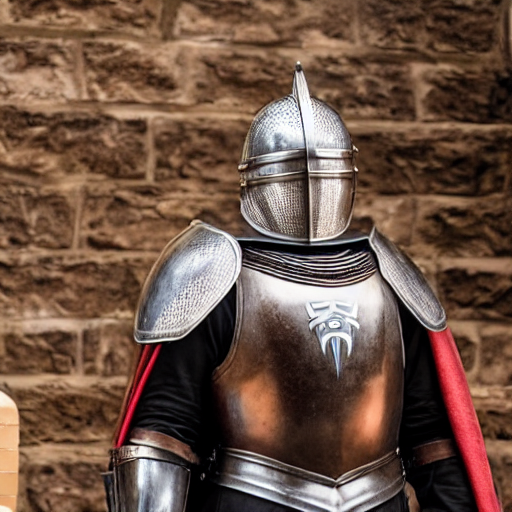

In [18]:
# Run Inference
from torch import autocast

with autocast(device):
  generator = torch.Generator("cuda").manual_seed(42)
  image = pipe(text['text'], generator=generator, guidance_scale=9).images[0]

image

In [19]:
# Save Image
image.save("./testimage1.png")